![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

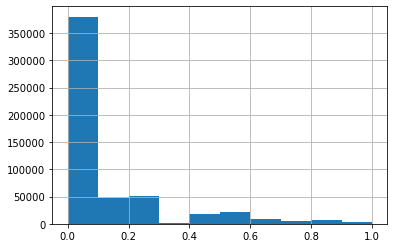

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
y_train_C =(y_train >=0.5).astype(int)
y_test_C =(y_test >=0.5).astype(int)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Celda 1
# Creación de matrices de documentos usando CountVectorizer a partir de X
vect_A = CountVectorizer(lowercase=True, max_features= 5500, ngram_range=(1, 2))
X_dtm_A = vect_A.fit_transform(X_train)
X_dtm_A_test = vect_A.transform(X_test)
temp_A=X_dtm_A

In [10]:
X_dtm_A.shape

(362779, 5500)

In [11]:
vect_A.vocabulary_

{'history': 1991,
 'is': 2235,
 'what': 5185,
 'ever': 1419,
 'they': 4608,
 'say': 3811,
 'it': 2317,
 'nazis': 2896,
 'in': 2116,
 'the': 4302,
 'did': 1171,
 'on': 3118,
 'native': 2889,
 'children': 845,
 'at': 455,
 'with': 5318,
 'full': 1694,
 'knowledge': 2467,
 'of': 3038,
 'government': 1793,
 'yup': 5496,
 'if': 2076,
 'happened': 1848,
 'who': 5245,
 'are': 370,
 'we': 5132,
 'to': 4728,
 'didn': 1178,
 'is what': 2299,
 'they say': 4628,
 'say it': 3812,
 'it is': 2341,
 'in the': 2155,
 'with the': 5332,
 'the full': 4385,
 'of the': 3079,
 'the government': 4392,
 'if they': 2087,
 'who are': 5246,
 'are we': 399,
 'to say': 4821,
 'marijuana': 2696,
 'less': 2534,
 'human': 2052,
 'health': 1934,
 'than': 4225,
 'which': 5229,
 'used': 5011,
 'and': 234,
 'there': 4592,
 'no': 2938,
 'ban': 508,
 'level': 2546,
 'leading': 2510,
 'crime': 1063,
 'its': 2382,
 'medical': 2744,
 'value': 5024,
 'effects': 1328,
 'proven': 3532,
 'author': 481,
 'also': 201,
 'should': 391

In [12]:
print(vect_A.get_feature_names()[-150:-100])

['won be', 'won the', 'wonder', 'wonder how', 'wonder if', 'wonder why', 'wonderful', 'wondering', 'word', 'words', 'work', 'work and', 'work for', 'work in', 'work with', 'worked', 'worker', 'workers', 'working', 'works', 'world', 'world and', 'world is', 'worried', 'worry', 'worry about', 'worse', 'worse than', 'worst', 'worth', 'worthy', 'would', 'would be', 'would do', 'would have', 'would like', 'would make', 'would never', 'would not', 'would say', 'would think', 'would you', 'wouldn', 'wouldn be', 'wouldn have', 'wow', 'write', 'writer', 'writers', 'writes']


In [13]:
rf = RandomForestRegressor(max_depth= 2, random_state=0)
rf.fit(X_dtm_A, y_train_C)

RandomForestRegressor(max_depth=2, random_state=0)

In [15]:
y_pred_A = rf.predict(X_dtm_A_test)
mse_A= mean_squared_error(y_test_C, y_pred_A)
print("MSE A: ", mse_A)

MSE A:  0.0672637143516406


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [16]:
# Celda 2
# Creación de matrices de documentos usando CountVectorizer a partir de X
vect_B = CountVectorizer(max_features= 5500, ngram_range=(1, 3))
X_dtm_B = vect_B.fit_transform(X_train)
X_dtm_B_test = vect_B.transform(X_test)

In [17]:
X_dtm_B.shape

(362779, 5500)

In [18]:
# Visualización de 50 términos en el diccionario de palabras
print(vect_B.get_feature_names()[-150:-100])

['work', 'work and', 'work for', 'work in', 'work with', 'worked', 'worker', 'workers', 'working', 'works', 'world', 'world and', 'world is', 'worried', 'worry', 'worry about', 'worse', 'worse than', 'worst', 'worth', 'worthy', 'would', 'would be', 'would be the', 'would do', 'would have', 'would have been', 'would have to', 'would like', 'would like to', 'would make', 'would never', 'would not', 'would not be', 'would say', 'would think', 'would you', 'wouldn', 'wouldn be', 'wow', 'write', 'writer', 'writes', 'writing', 'written', 'wrong', 'wrong with', 'wrote', 'www', 'www youtube']


In [19]:
rfB = RandomForestRegressor(max_depth= 2, random_state=0)
rfB.fit(X_dtm_B, y_train_C)

RandomForestRegressor(max_depth=2, random_state=0)

In [20]:
y_pred_B = rfB.predict(X_dtm_B_test)
mse_B = mean_squared_error(y_test_C, y_pred_B)
print("MSE B: ", mse_B)

MSE B:  0.0672637143516406


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

Es un comando muy utilizado en la clasificación de texto, esta función convierte la palabra del texto en vector.
TF corresponde a la frecuencia de palabras
IDF es la frecuencia
FDI es el grado de importancia 
Como input, necesita el archivo y si es un archivo o el contenido, la salida es una matriz.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [21]:
# Celda 4
vect_T = TfidfVectorizer(max_features=5500)
X_dtm_T = vect_T.fit_transform(X_train)
X_dtm_T_test = vect_T.transform(X_test)
temp_T=X_dtm_T

In [22]:
X_dtm_T.shape

(362779, 5500)

In [23]:
print(vect_T.get_feature_names()[-150:-100])

['welfare', 'well', 'wells', 'went', 'wente', 'were', 'weren', 'west', 'western', 'wet', 'wh', 'what', 'whatever', 'whats', 'whatsoever', 'wheel', 'when', 'whenever', 'where', 'whereas', 'wherever', 'whether', 'which', 'while', 'whine', 'whining', 'white', 'whites', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'wide', 'widely', 'wife', 'wiki', 'wikileaks', 'wikipedia', 'wild', 'wilderness', 'wildlife', 'will', 'william', 'willing', 'willingness', 'wilson', 'win', 'wind']


In [25]:
rfT = RandomForestRegressor(max_depth=2, random_state=42)
rfT.fit(X_dtm_T, y_train_C)

RandomForestRegressor(max_depth=2, random_state=42)

In [26]:
y_pred_T = rfT.predict(X_dtm_T_test)
mse_T= mean_squared_error(y_test_C, y_pred_T)
print("MSE T:", mse_T)

MSE T: 0.06714246718011044


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

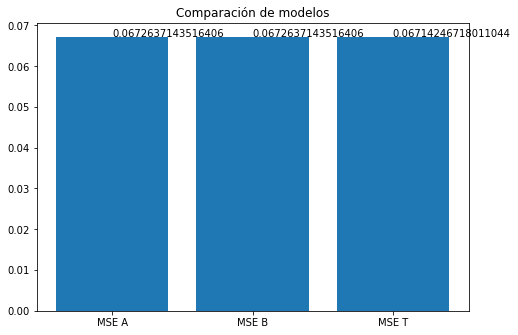

In [27]:
# Celda 5
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = [ 'MSE A', 'MSE B', 'MSE T']
ejeY = [ mse_A, mse_B, mse_T]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Para esta comparación se utilizo en modelo de RandomForest.
Del análisis de tokenización realizado en los 2 primeros puntos, se obtuvo un mismo valor de MSE. Esto puede que se deba a que unigrama y trigrama no dan la suficiente relación del texto para que cambie el detalle de la probabilidad de secuencia de palabras. Con la función **TfidfVectorizer** obtuvimos una pequeña disminución en el MSE del análisis, en este método analiza mas a detalle la frecuencia y el comportamiento del texo del set de prueba, por lo que posiblemente hace que disminuya el error de la predicción.
Otra variable es la selección del modelo, que probablemente disminuya el MSE.